In [1]:
import sys
sys.path.append('../')
import visualize
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns
import pandas as pd

import utils
import metrics

In [2]:
visualize.setup_matplotlib()

## Baselines and statistical performance

In [3]:
datasets_= ['fpb', 'sst2', 'subj', 'hatespeech']

In [4]:
def create_dataframe(models, 
                     surrogates, 
                     datasets, 
                     entropy=None,
                     nll=None,
                     importance_sampling=None,
                     ase=None):
    m = []
    s = []
    d = []
    f = []
    e = []
    x = []
    imp_s = []
    ase_ = []
    for dataset in datasets:
        for i, surrogate in enumerate(surrogates):
            for model in models:
                m.append(model)
                s.append(surrogate)
                d.append(dataset)
                if ((ase is not None) and ase[i]):
                    e.append(False)
                    x.append(False)
                    ase_.append(True)
                    f.append(f'{model}_{surrogate}_ase_loss_zs')
                elif ((entropy is None or not(entropy[i])) 
                    and (nll is None or not(nll[i]))):
                    f.append(f'{model}_{surrogate}_loss')
                    e.append(False)
                    x.append(False)
                    ase_.append(False)
                elif (entropy is not None) and entropy[i]:
                    f.append(f'{model}_{surrogate}_loss_entropy')
                    e.append(True)
                    x.append(False)
                    ase_.append(False)
                else:
                    f.append(f'{model}_{surrogate}_loss_nll')
                    e.append(False)
                    x.append(True)
                    ase_.append(False)
                if (importance_sampling is not None) and importance_sampling[i]:
                    imp_s.append(True)
                    f[-1] = f[-1] + '_iid'
                else:
                    imp_s.append(False)
    df = pd.DataFrame({'Model': m,
                       'Surrogate': s,
                       'Dataset': d,
                       'File': f,
                      'Entropy': e,
                      'NLL': x,
                      'IS': imp_s,
                      'ASE': ase_})
    return df

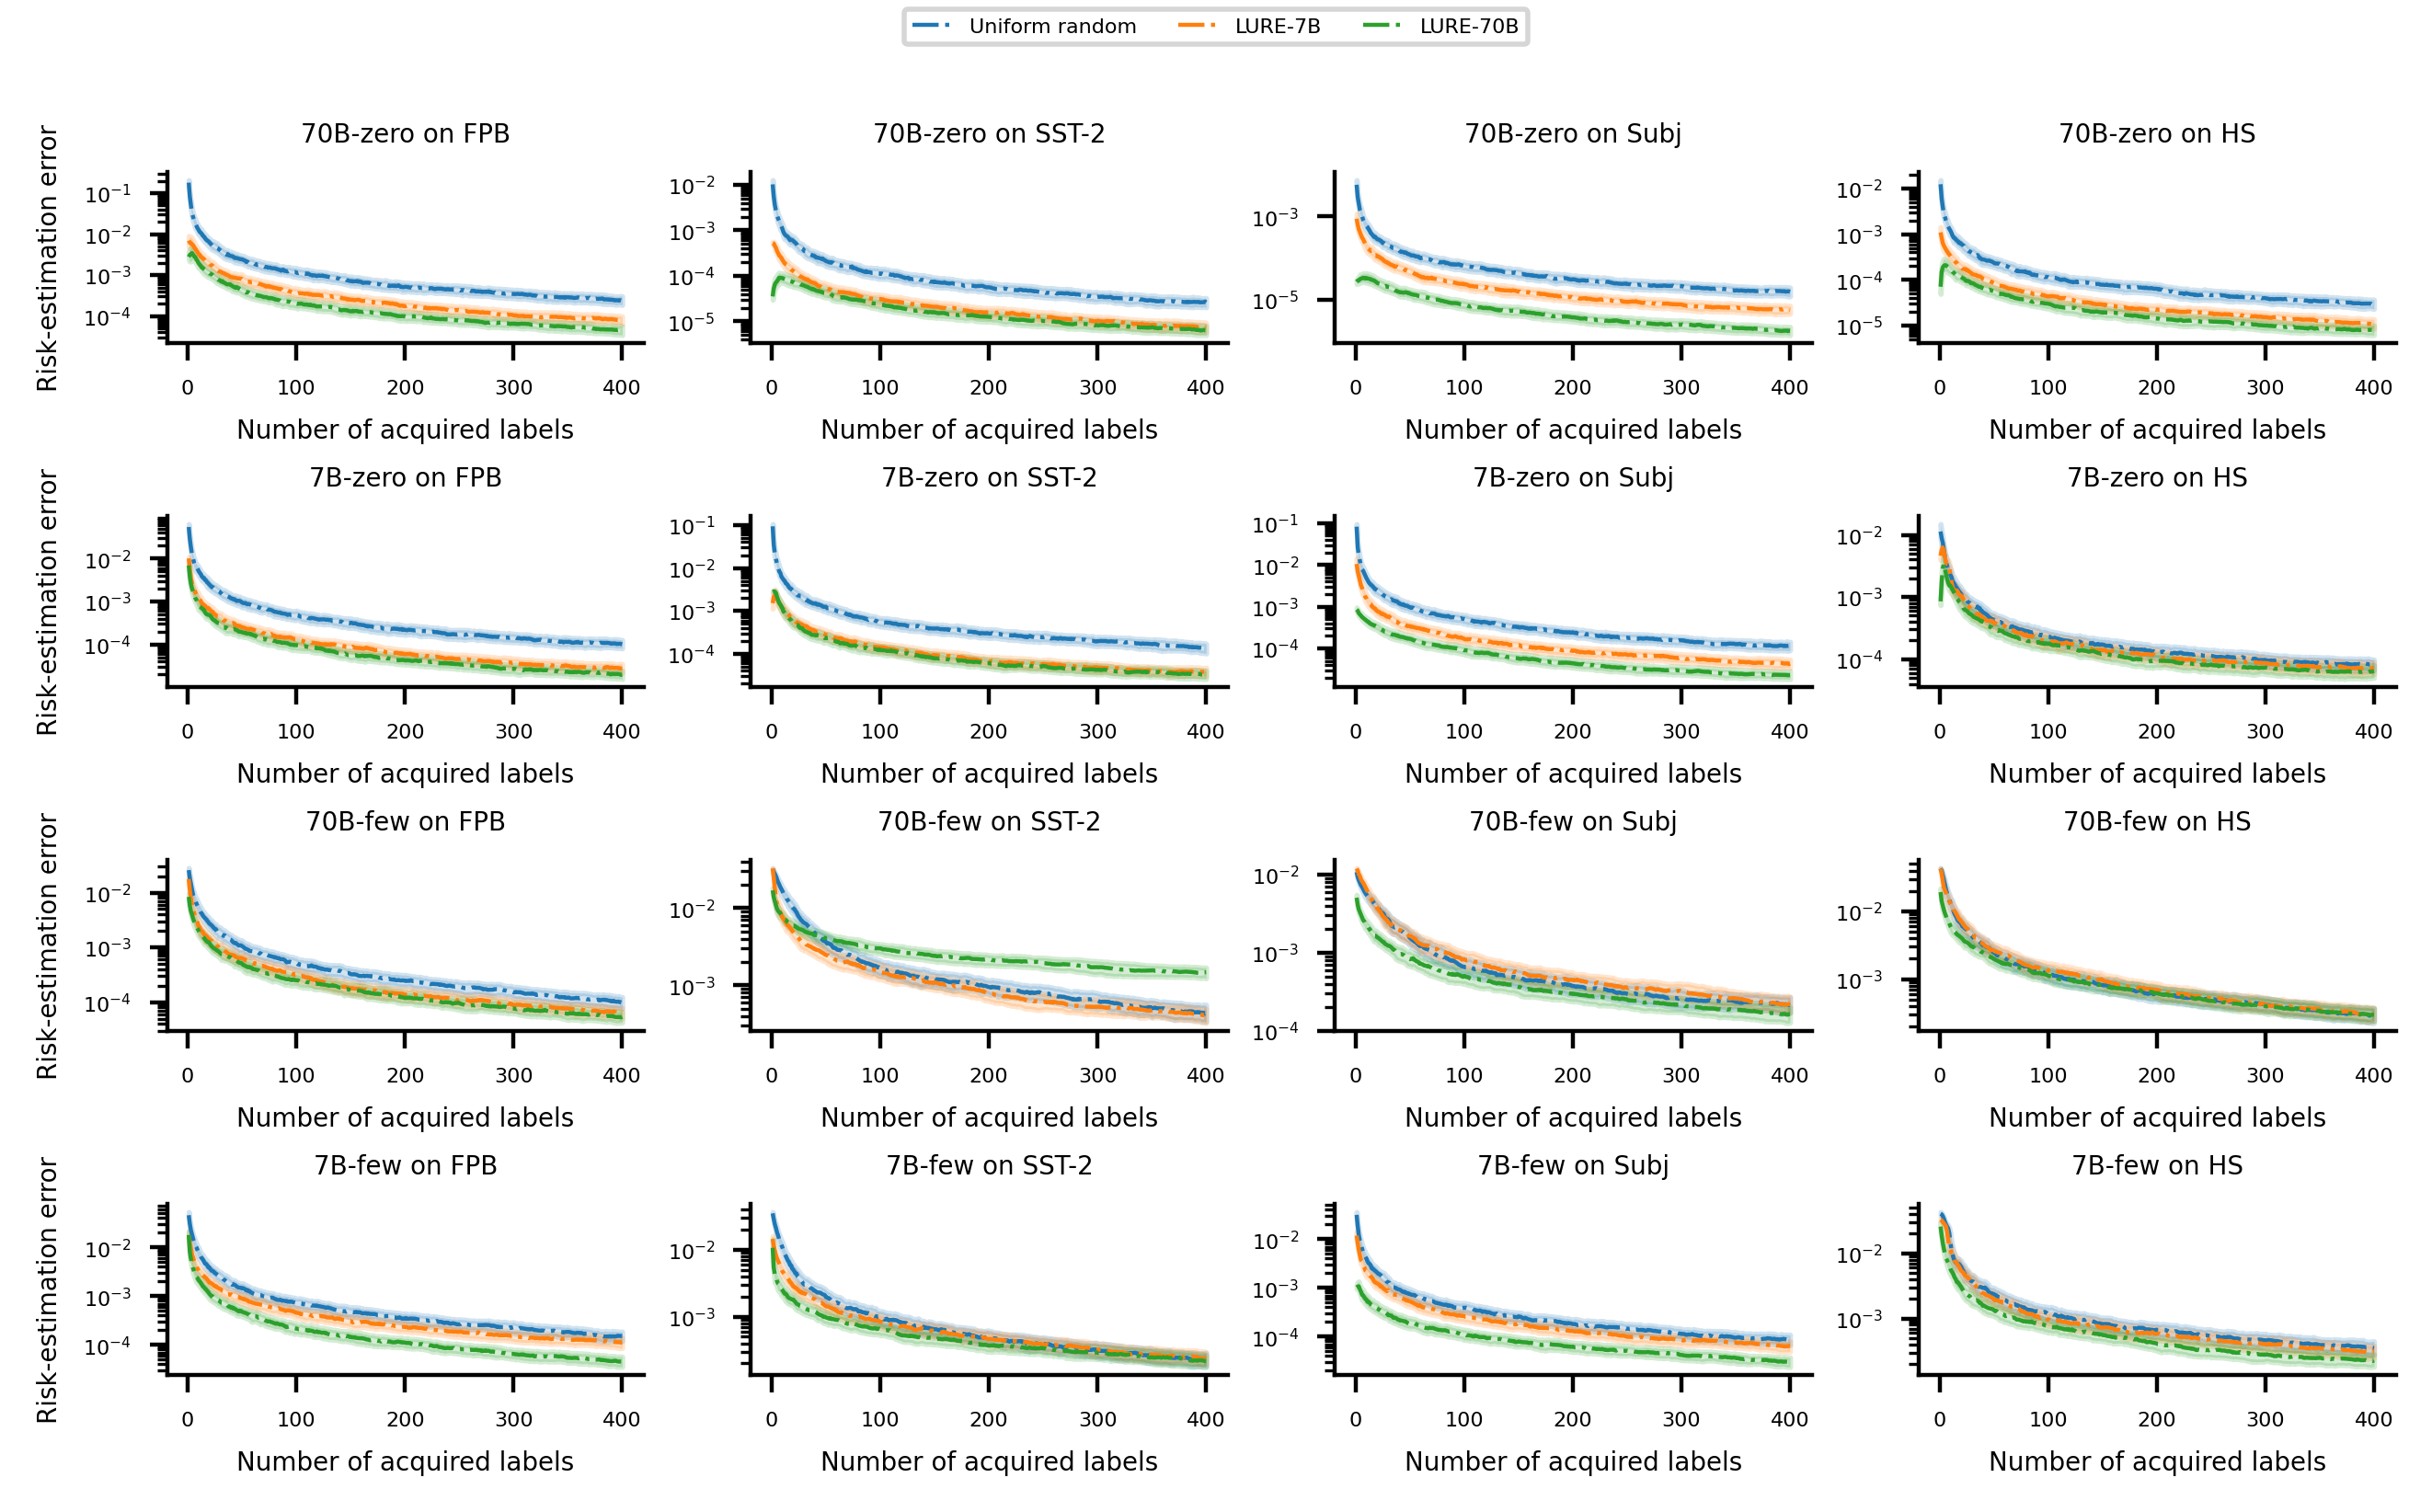

In [5]:
files = {'Uniform random': 'iid_loss',
        r'LURE-7B': 'llama2_7b_icl50_loss',
         r'LURE-70B': 'llama2_70b_icl50_loss'}
visualize.plot_comparison_errors(step=1,
                                 datasets=datasets_,
                                 models=['llama2_70b', 'llama2_7b', 'llama2_70b_icl50', 'llama2_7b_icl50'],
                                 files=files,
                                 ratios=(1.65, 1),
                                 savefig=(False, ''))

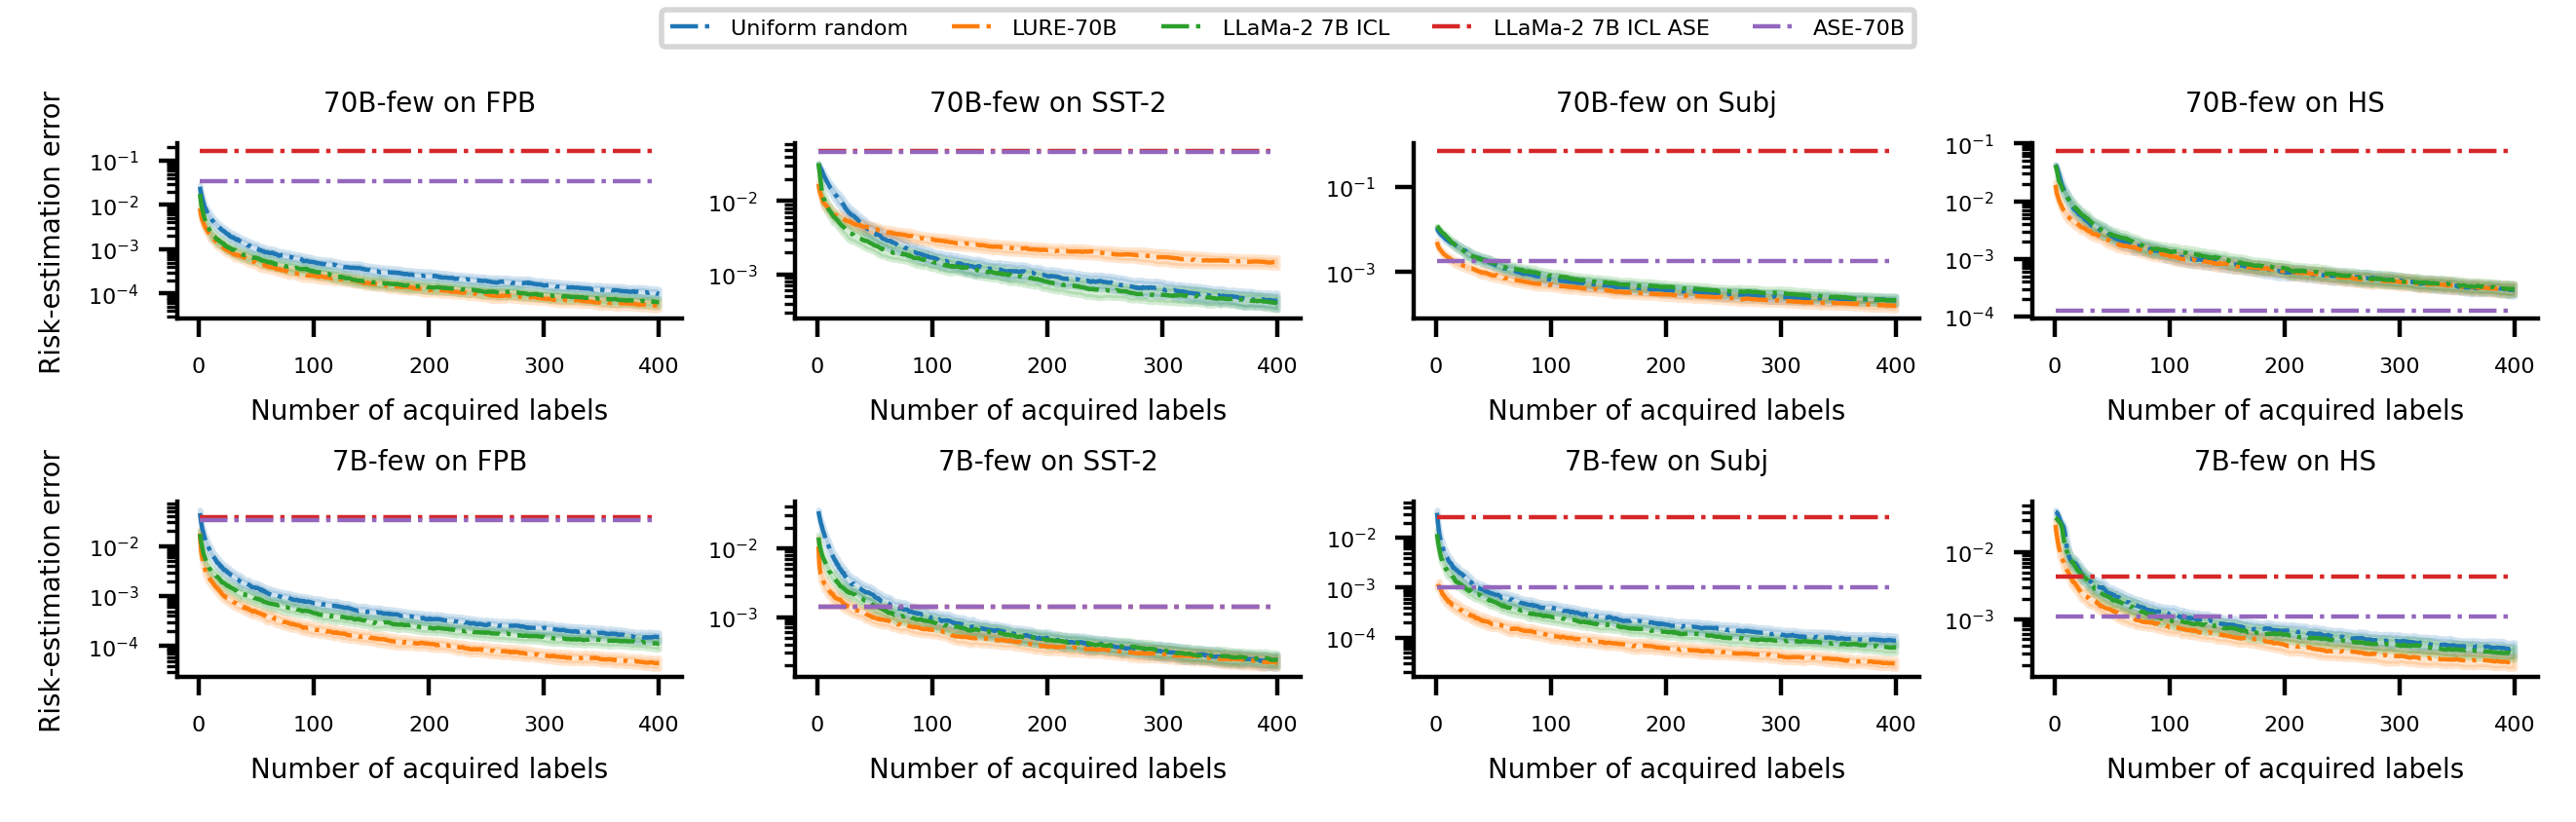

In [6]:
files = {'Uniform random': 'iid_loss',
         r'LURE-70B': 'llama2_70b_icl50_loss',
         r'LLaMa-2 7B ICL': 'llama2_7b_icl50_loss',
        r'LLaMa-2 7B ICL ASE': 'llama2_7b_icl50_ase_loss_zs',
         r'ASE-70B': 'llama2_70b_icl50_ase_loss_zs'}
visualize.plot_comparison_errors(step=1,
                                 datasets=datasets_,
                                 models=['llama2_70b_icl50', 'llama2_7b_icl50'],
                                 files=files,
                                 ratios=(1.65, 1),
                                 savefig=(False, ''))

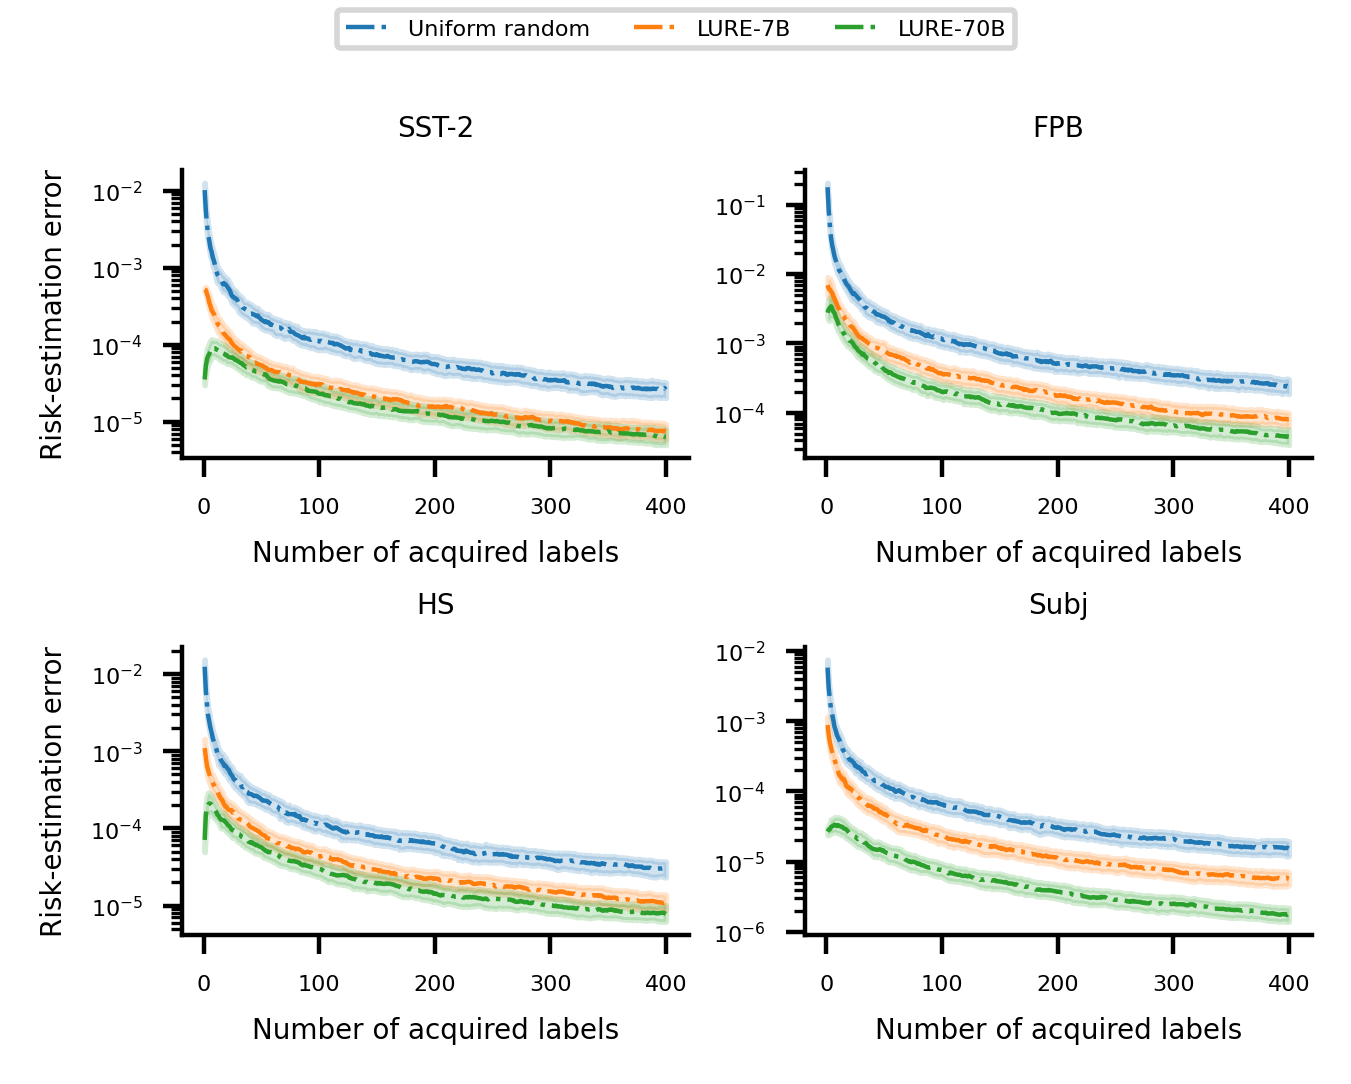

In [9]:
files = {'Uniform random': 'iid_loss',
        r'LURE-7B': 'llama2_7b_icl50_loss',
         r'LURE-70B': 'llama2_70b_icl50_loss'}
visualize.plot_comparison_errors_small(step=1,
                                        datasets=['sst2', 'fpb', 'hatespeech', 'subj'],
                                        model='llama2_70b',
                                        files=files,
                                        savefig=(False, ''))

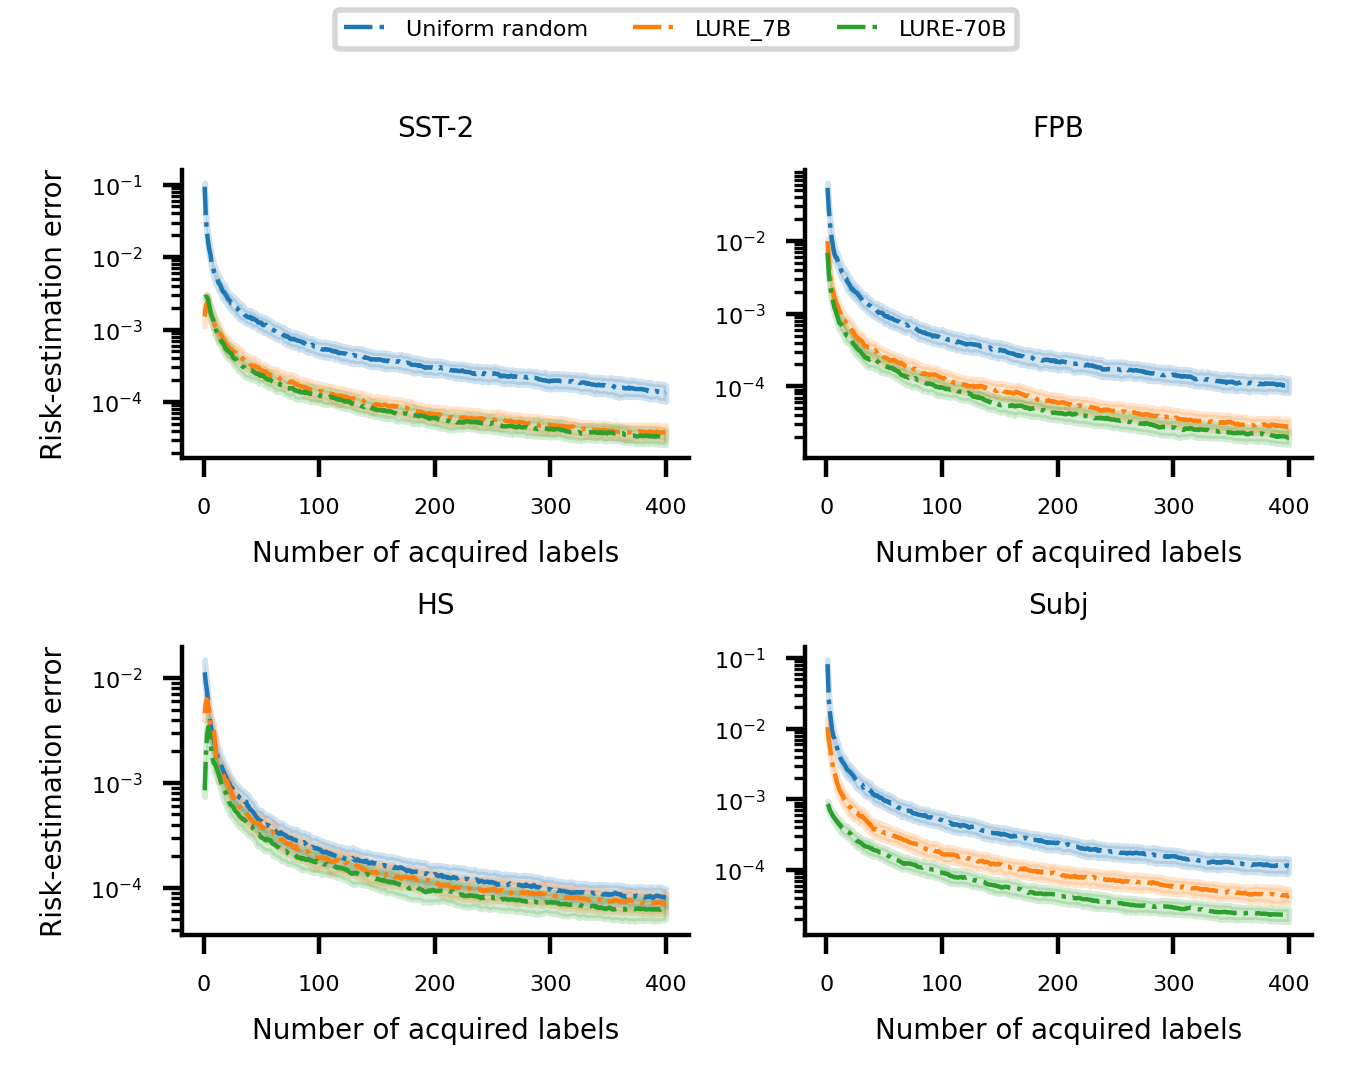

In [10]:
files = {'Uniform random': 'iid_loss',
        r'LURE_7B': 'llama2_7b_icl50_loss',
         r'LURE-70B': 'llama2_70b_icl50_loss'}
visualize.plot_comparison_errors_small(step=1,
                                    datasets=['sst2', 'fpb', 'hatespeech', 'subj'],
                                    model='llama2_7b',
                                    files=files,
                                    savefig=(False, ''))

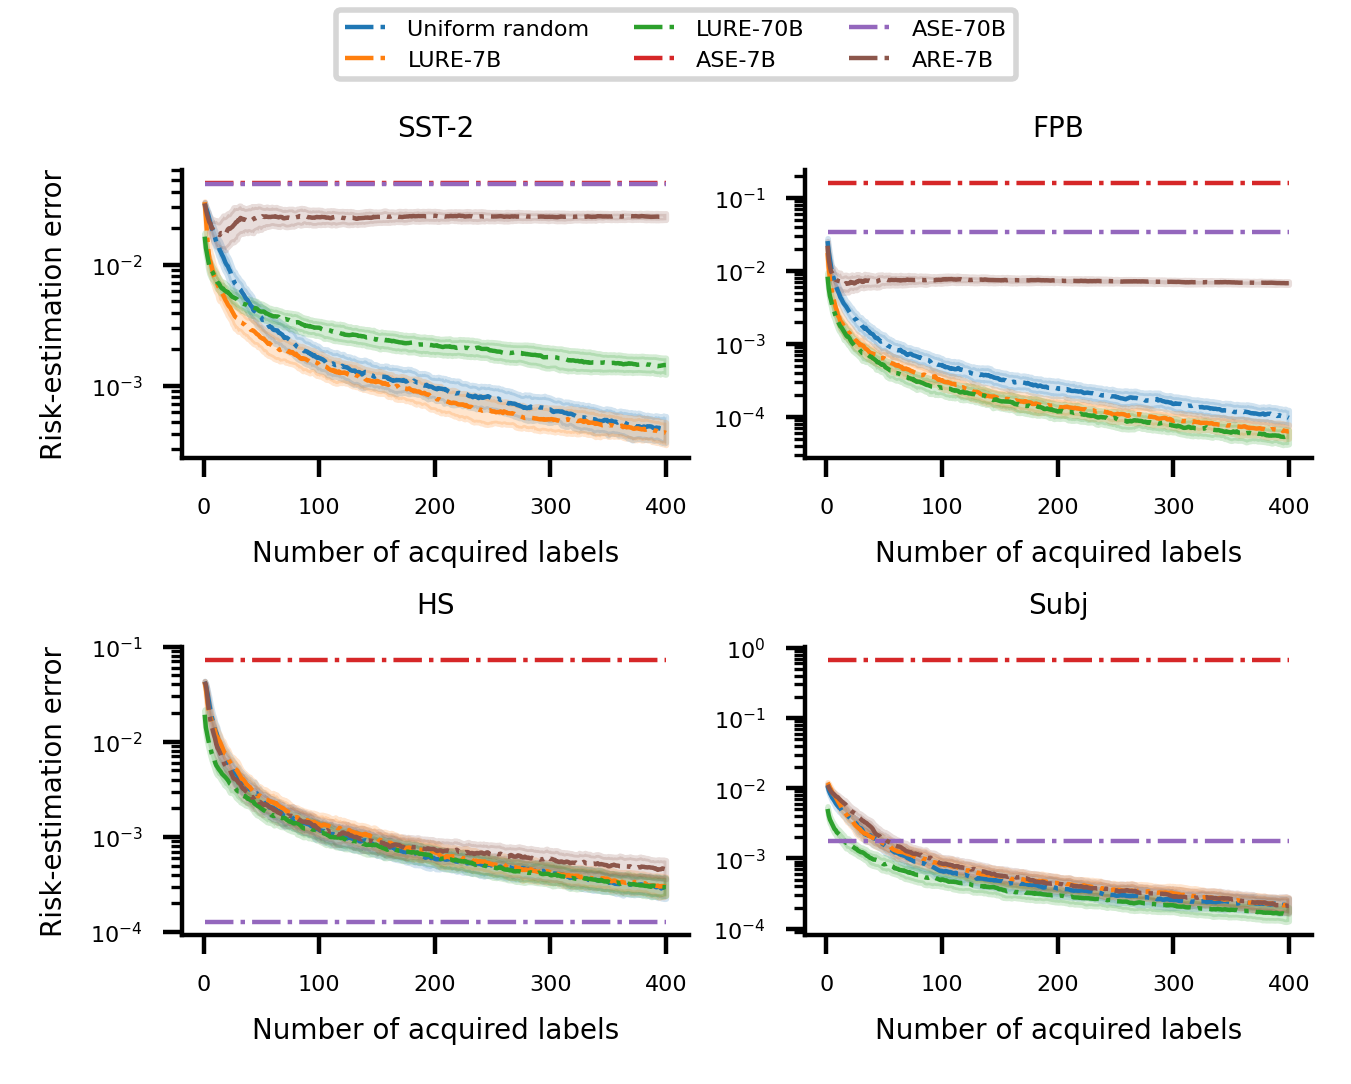

In [12]:
models = ['llama2_70b_icl50']
files = {'Uniform random': 'iid_loss',
        r'LURE-7B': 'llama2_7b_icl50_loss',
         r'LURE-70B': 'llama2_70b_icl50_loss',
         r'ASE-7B': 'llama2_7b_icl50_ase_loss_zs',
         r'ASE-70B': 'llama2_70b_icl50_ase_loss_zs',
         r'ARE-7B': 'llama2_7b_icl50_loss_iid'}
visualize.plot_comparison_errors_small(step=1,
                                    datasets=['sst2', 'fpb', 'hatespeech', 'subj'],
                                    model='llama2_70b_icl50',
                                    files=files,
                                    savefig=(False, ''))

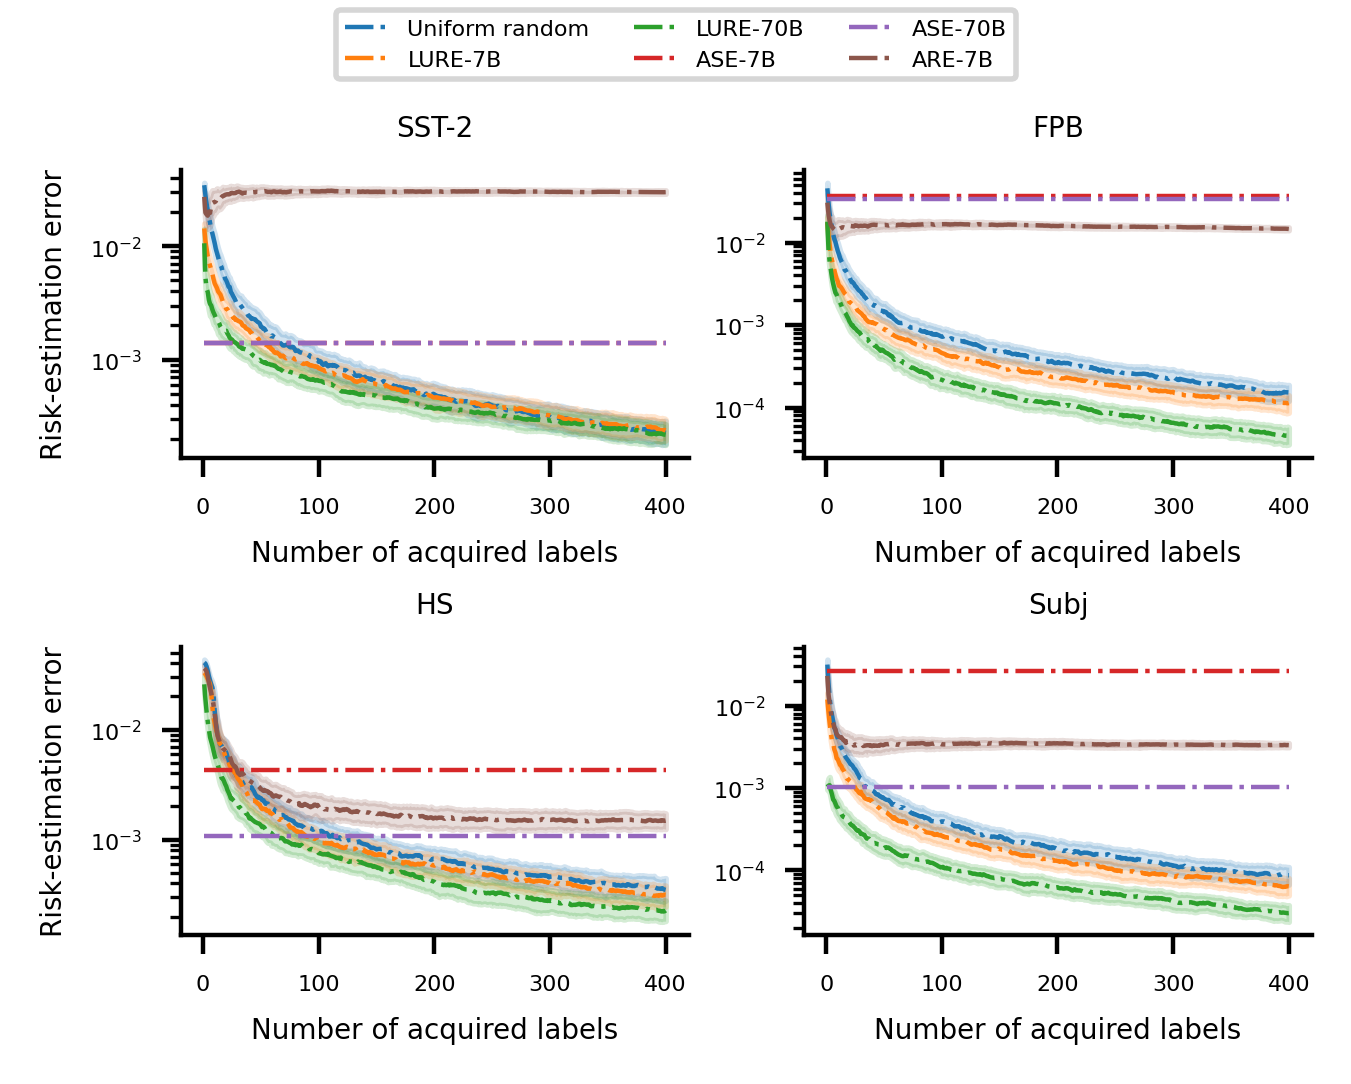

In [13]:
models = ['llama2_70b_icl50']
files = {'Uniform random': 'iid_loss',
        r'LURE-7B': 'llama2_7b_icl50_loss',
         r'LURE-70B': 'llama2_70b_icl50_loss',
         r'ASE-7B': 'llama2_7b_icl50_ase_loss_zs',
         r'ASE-70B': 'llama2_70b_icl50_ase_loss_zs',
         r'ARE-7B': 'llama2_7b_icl50_loss_iid'}
visualize.plot_comparison_errors_small(step=1,
                                    datasets=['sst2', 'fpb', 'hatespeech', 'subj'],
                                    model='llama2_7b_icl50',
                                    files=files,
                                    savefig=(False, ''))

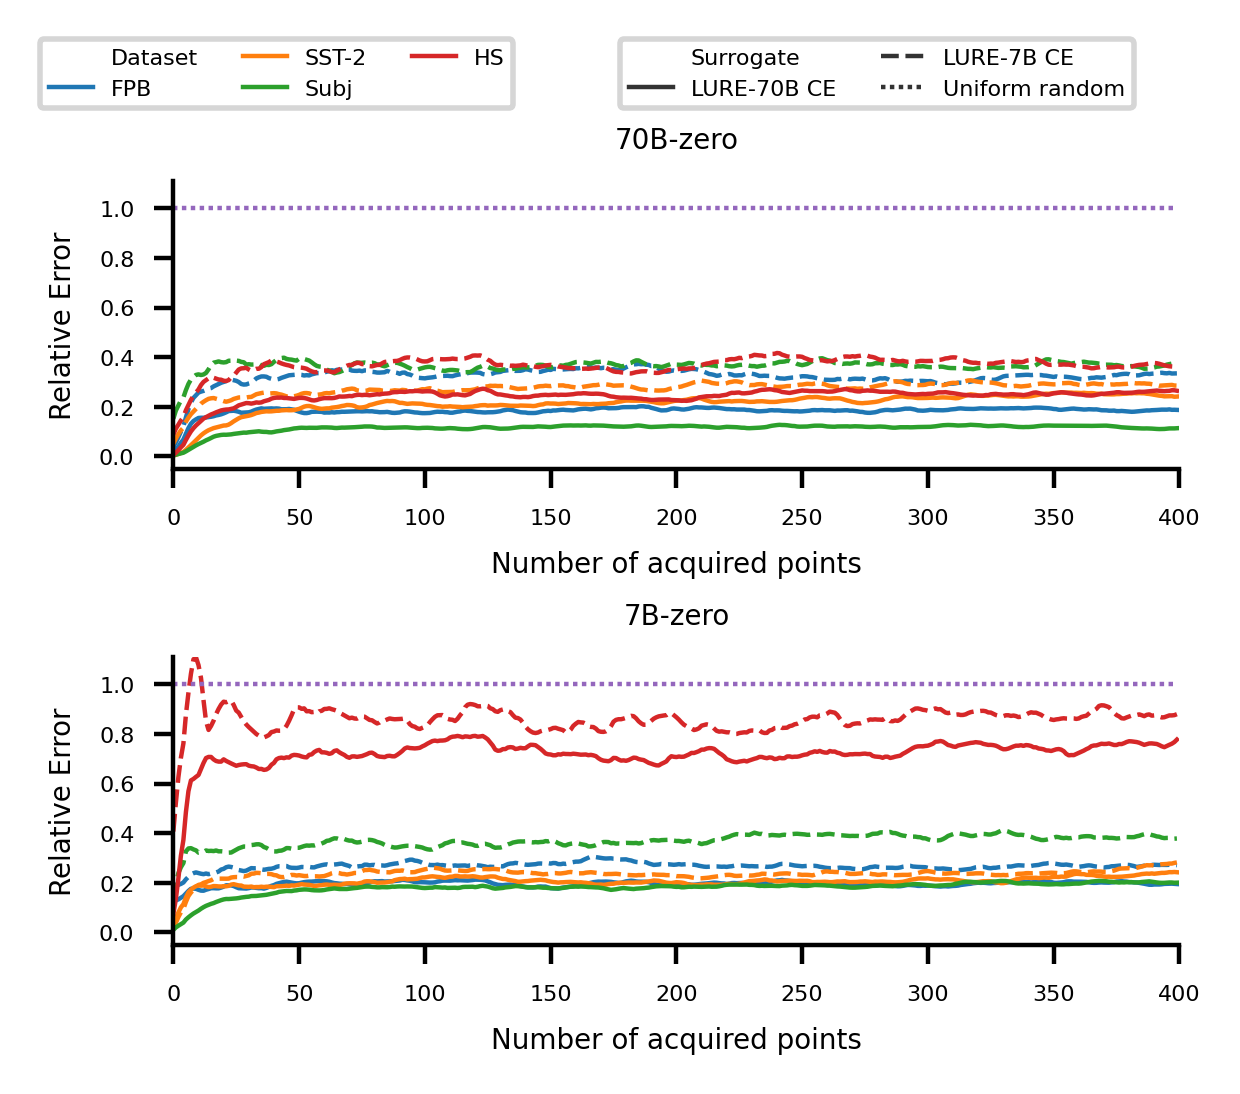

In [19]:
surrogates = [
            'llama2_70b_icl50',
            'llama2_7b_icl50',
             ]
models = ['llama2_70b', 'llama2_7b']
df = create_dataframe(models, surrogates, datasets_)
visualize.plot_relative_error(df, metrics.median_se, title='', savefig=(False, ''), xlim=400, smoothing=5, subset='full')

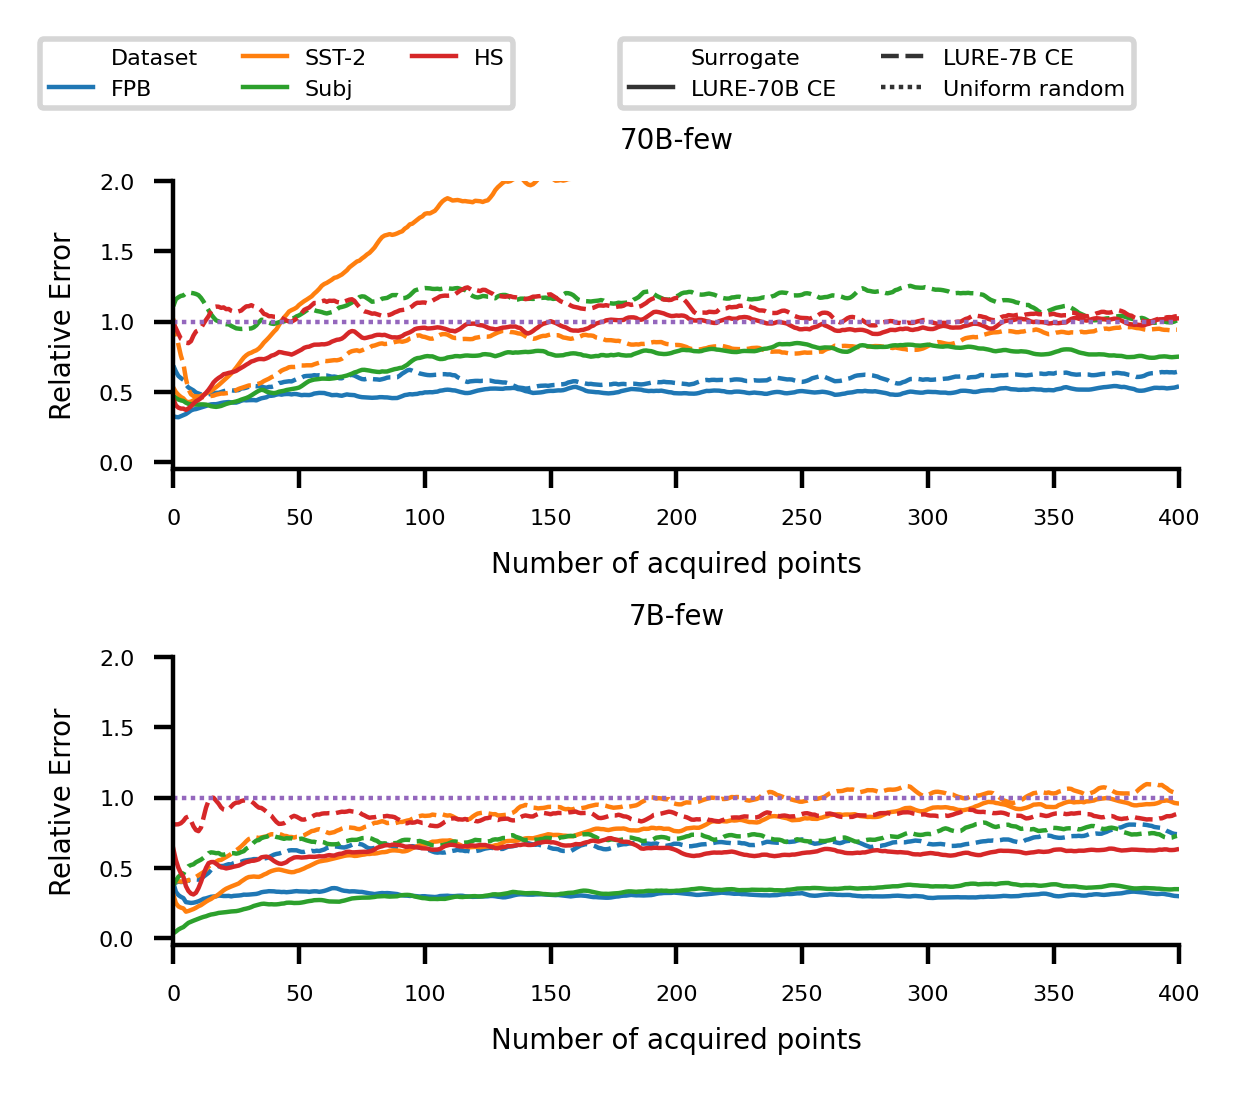

In [20]:
surrogates = [
            'llama2_70b_icl50',
            'llama2_7b_icl50',
             ]
models = ['llama2_70b_icl50', 'llama2_7b_icl50']
df = create_dataframe(models, surrogates, datasets_)
visualize.plot_relative_error(df, metrics.median_se, title='', savefig=(False, ''), xlim=400, smoothing=5, subset='full')

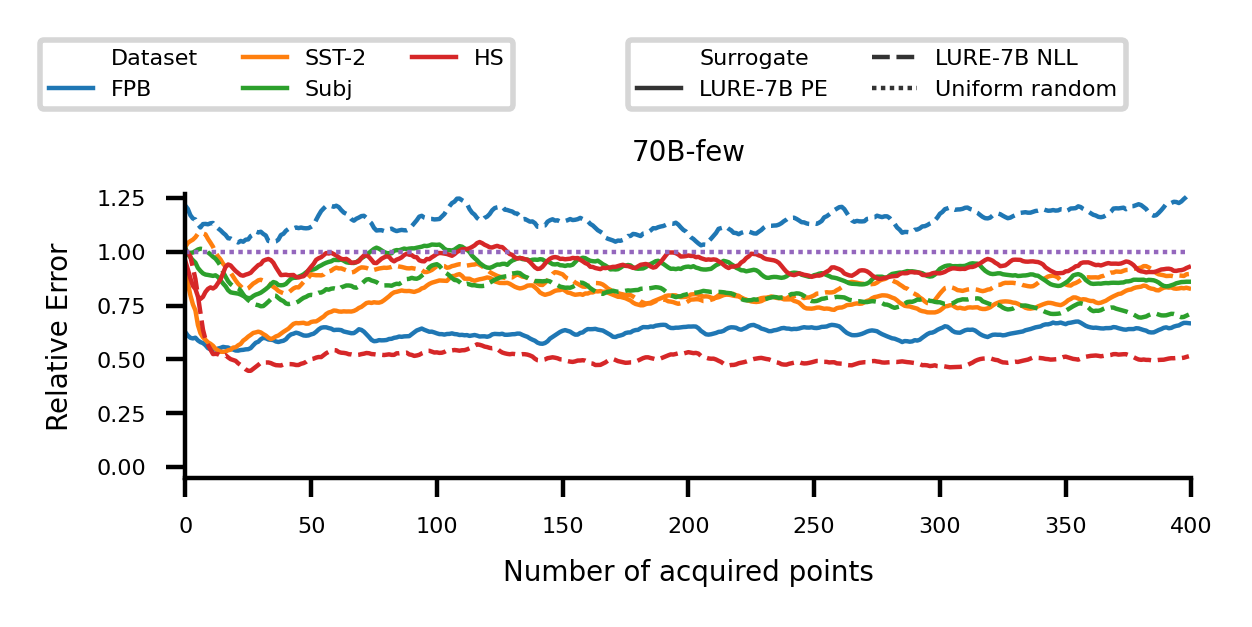

In [21]:
surrogates = [
            'llama2_7b_icl50',
            'llama2_7b_icl50',
             ]  
models = ['llama2_70b_icl50']
df = create_dataframe(models, surrogates, datasets_, entropy=[True, False], nll=[False, True])
visualize.plot_relative_error(df, metrics.median_se, title='', savefig=(False, ''), xlim=400, smoothing=5, subset='full')

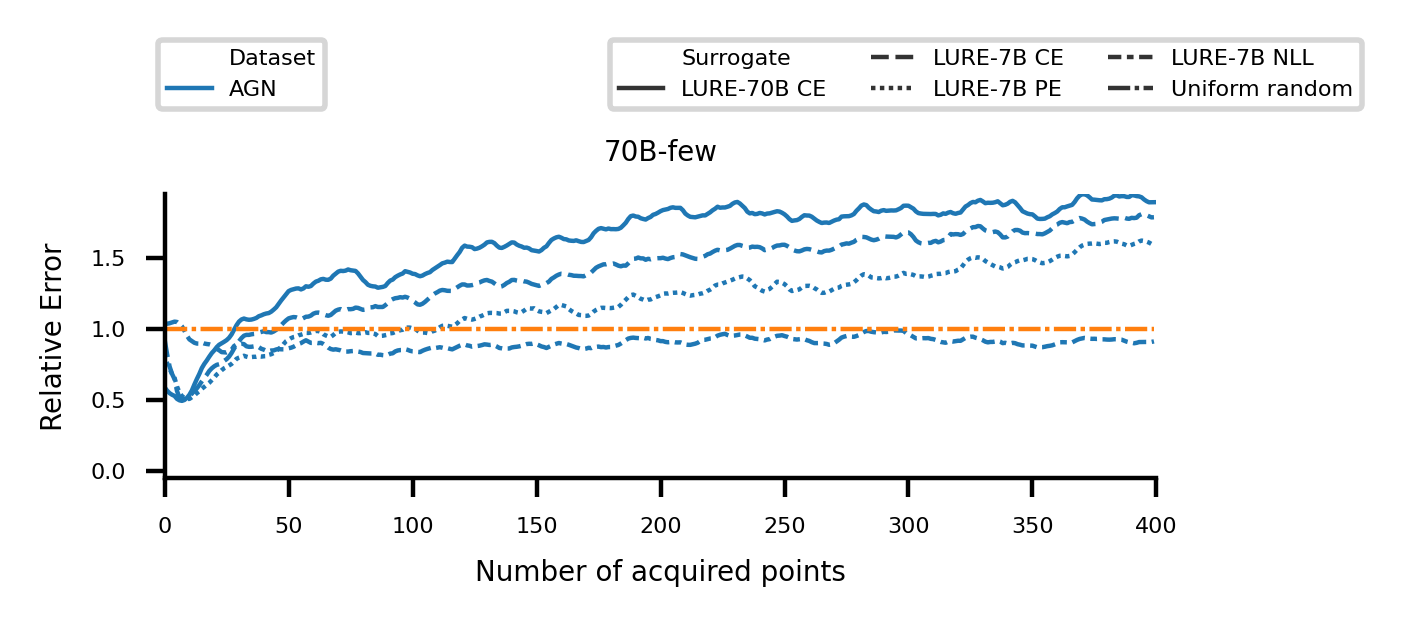

In [24]:
#bbox_to_anchor=(0.55, 1.12)
surrogates = [
            'llama2_70b_icl40',
            'llama2_7b_icl40',
            'llama2_7b_icl40',
            'llama2_7b_icl40'
             ]
models = ['llama2_70b_icl40']
entropy = [False, False, True, False]
nll = [False, False, False, True]
df = create_dataframe(models, surrogates, ['agnews'], entropy, nll)
dataset_ = visualize.plot_relative_error(df, metrics.median_se, title='', savefig=(False, ''), xlim=400, smoothing=5, subset='full')

## Coverage estimation

In [25]:
def dataframe_mse(models, surrogates, datasets, entropy=None, nll=None):
    m = []
    s = []
    d = []
    f = []
    e = []
    x = []
    for dataset in datasets:
        for i, surrogate in enumerate(surrogates):
            for model in models:
                m.append(model)
                s.append(surrogate)
                d.append(dataset)
                f.append(f'{model}_{surrogate}')
                if ((entropy is None or not(entropy[i])) 
                    and (nll is None or not(nll[i]))):
                    e.append(False)
                    x.append(False)
                elif (entropy is not None) and entropy[i]:
                    e.append(True)
                    x.append(False)
                elif (nll is not None) and nll[i]:
                    e.append(False)
                    x.append(True)
    df = pd.DataFrame({'Model': m,
                       'Surrogate': s,
                       'Dataset': d,
                       'File': f,
                      'Entropy': e,
                      'NLL': x})
    return df

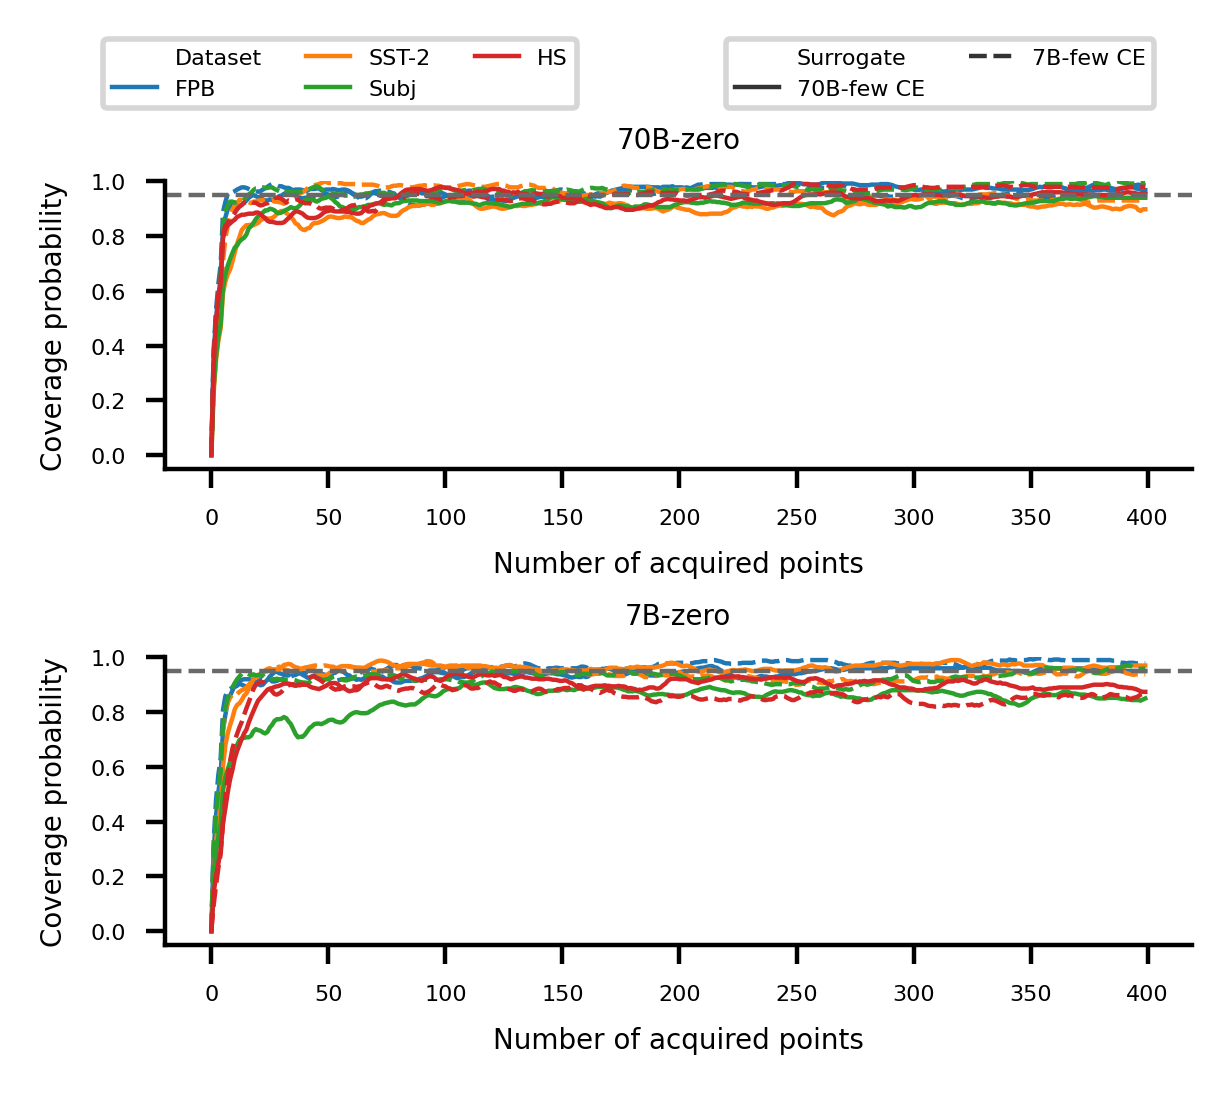

In [26]:
df = dataframe_mse(['llama2_70b', 'llama2_7b'], ['llama2_70b_icl50', 'llama2_7b_icl50'], datasets_)
res_zs = visualize.plot_bootstrap_error_estimation(df, ylim=0.4, smoothing=5, confidence_interval=2, savefig=(False, ''), subset='full')

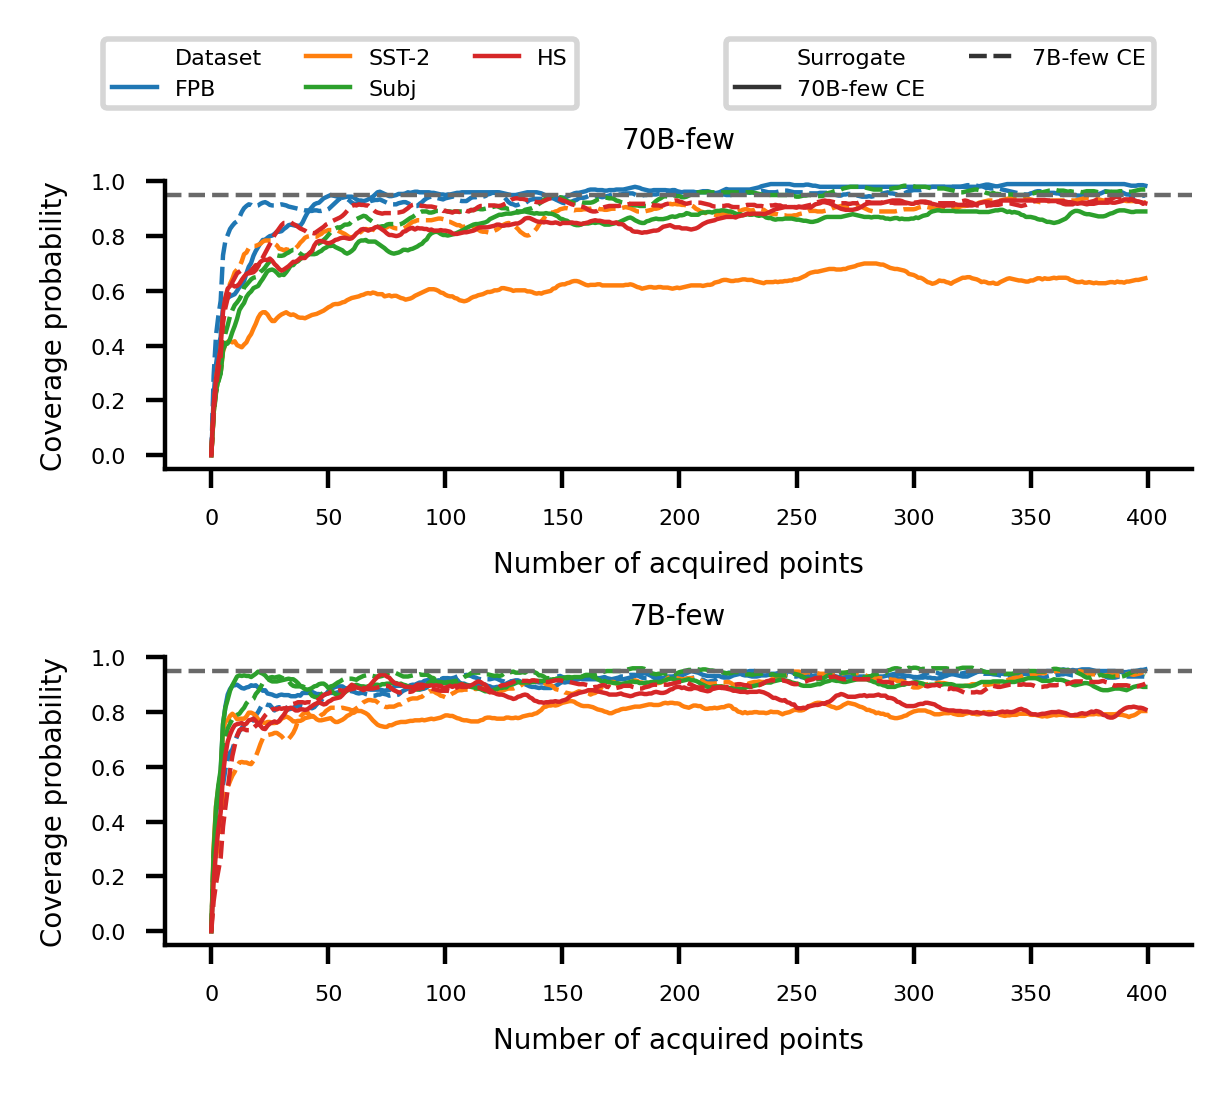

In [27]:
df = dataframe_mse(['llama2_70b_icl50', 'llama2_7b_icl50'], ['llama2_70b_icl50', 'llama2_7b_icl50'], datasets_)
res_icl = visualize.plot_bootstrap_error_estimation(df, ylim=0.4, smoothing=5, confidence_interval=2, savefig=(False, ''), subset='full')

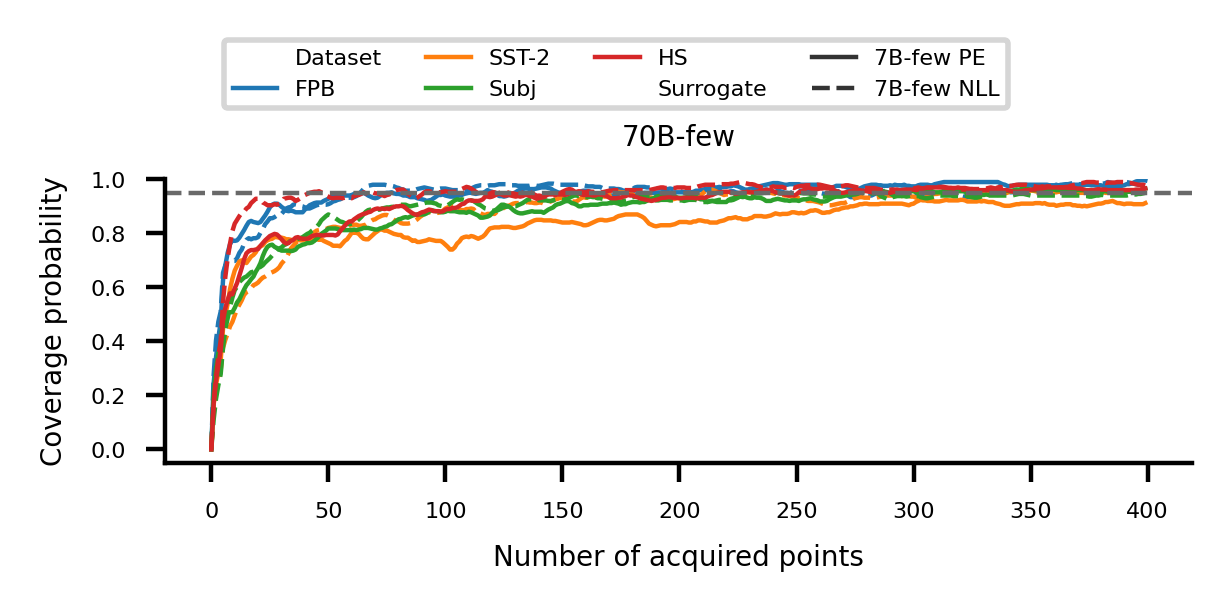

In [28]:
df = dataframe_mse(['llama2_70b_icl50'], ['llama2_7b_icl50', 'llama2_7b_icl50'], datasets_, entropy=[True, False], nll=[False, True])
res_entropy = visualize.plot_bootstrap_error_estimation(df, ylim=0.4, smoothing=5, confidence_interval=2, savefig=(False, ''), subset='full')